In [21]:
from albumentations import (
    RandomRotate90, Flip, Compose, Rotate, Crop
)
import numpy as np

def aug1(prob=1):
    return Compose([
        RandomRotate90(p=1*prob),
        Flip(p=0.75*prob),
        Rotate(p=0.75*prob),
        Crop(x_min=123, x_max=255, y_min=123, y_max=255)
    ], p=1)

def aug2(prob=1):
    return Compose([
        RandomRotate90(p=1*prob),
        Flip(p=0.75*prob),
        Rotate(p=0.75*prob),
        Crop(x_min=146, x_max=278, y_min=146, y_max=278)
    ], p=1)

In [18]:
123 - 255

-132

In [19]:
146 - 278

-132

In [14]:
#     3x96 -5> 16x92 -> 46 -3> 32x44 -> 22 -3> 64x20 -> 10 -3> 128x8 -> 4

In [15]:
# 3x132 -5> 16x128 -> 64 -5> 32x60 -> 30 -3> 64x28 -> 14 -3> 128x12 -> 6 

(424, 424, 3)


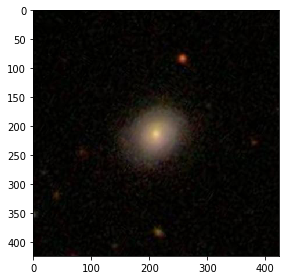

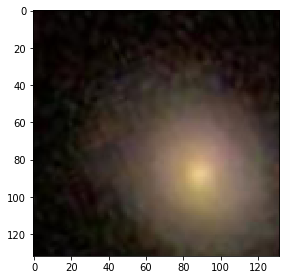

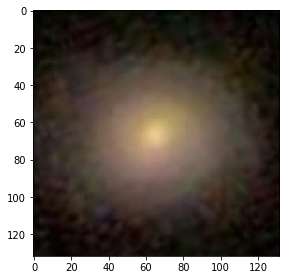

(424, 424, 3)


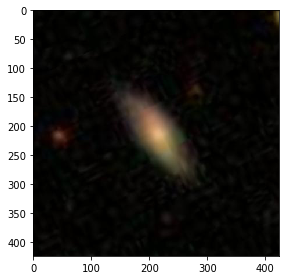

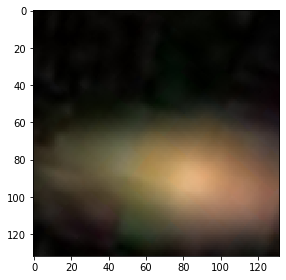

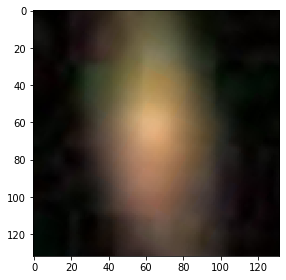

(424, 424, 3)


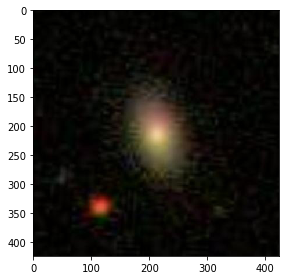

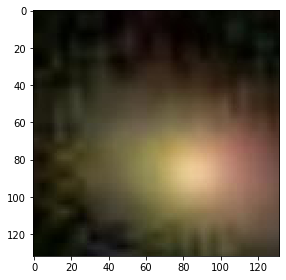

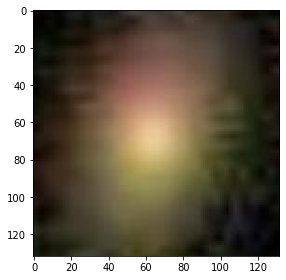

(424, 424, 3)


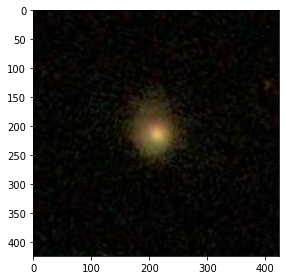

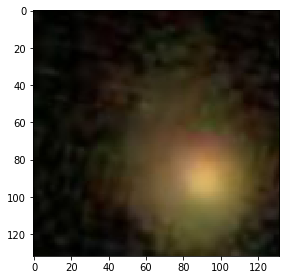

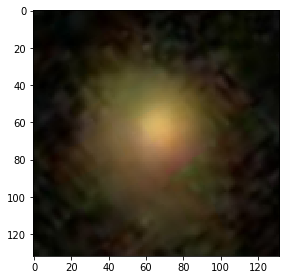

(424, 424, 3)


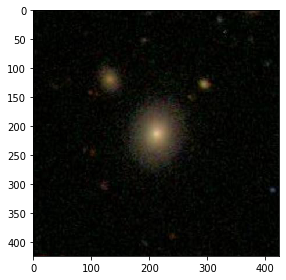

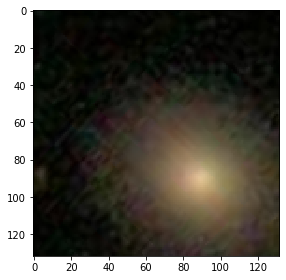

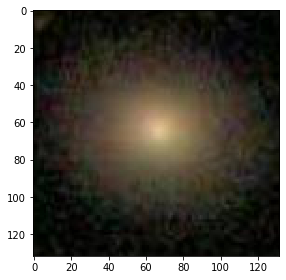

(424, 424, 3)


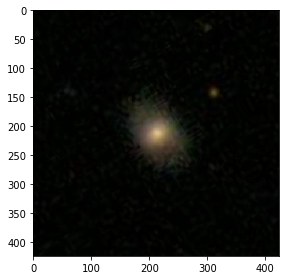

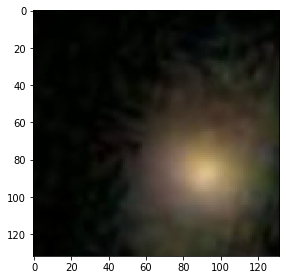

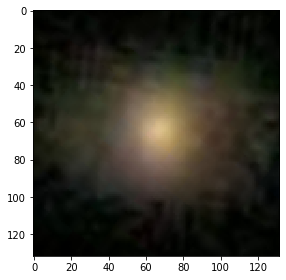

(424, 424, 3)


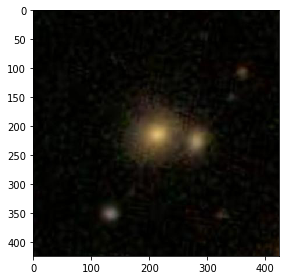

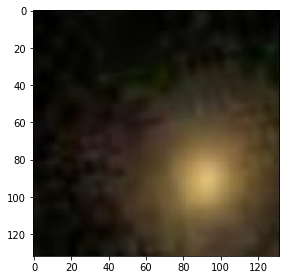

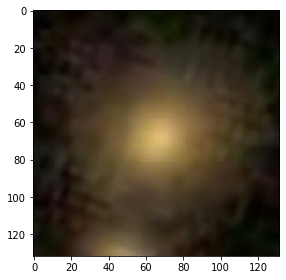

(424, 424, 3)


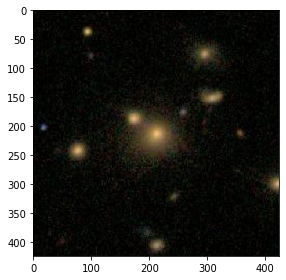

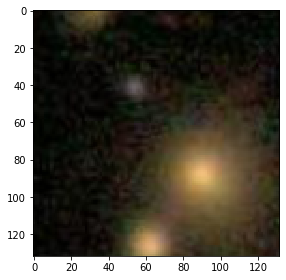

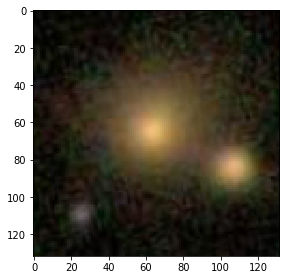

(424, 424, 3)


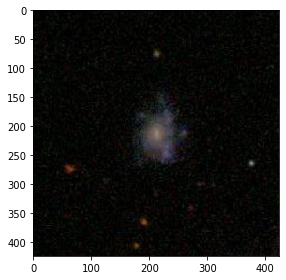

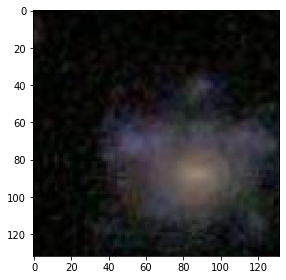

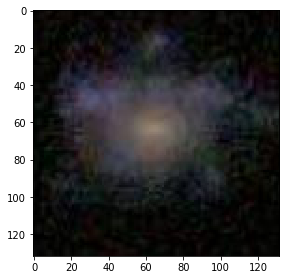

(424, 424, 3)


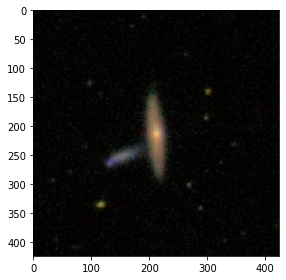

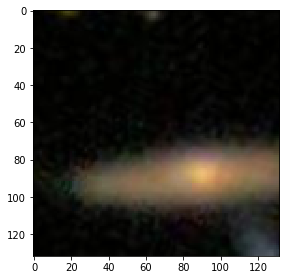

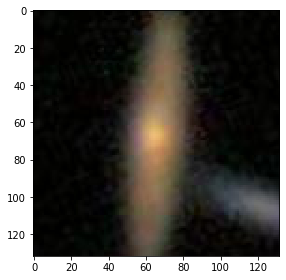

In [23]:
import numpy as np
import pandas as pd
import os
from skimage import io

import matplotlib.pyplot as plt
%matplotlib inline 


data_csv = "../data/training_solutions_rev1/training_solutions_rev1.csv"
root_dir = "../data/images_training_rev1"

csv_data = pd.read_csv(data_csv)

res = np.zeros((424,424,3), dtype=np.uint64)

n = len(csv_data)

for i in range(10):
    img_path = os.path.join(root_dir, str(csv_data["GalaxyID"][i]) + ".jpg")
    image = io.imread(img_path)
    
    augmentation = aug1(prob=1)    
    augmented = augmentation(**{"image":image})
    image_augmanted_1 = augmented["image"]
    
    augmentation = aug2(prob=1)    
    augmented = augmentation(**{"image":image})
    image_augmanted_2 = augmented["image"]
    
    print(image.shape)
    
    io.imshow(image.astype('uint8'))
    plt.show()
    io.imshow(image_augmanted_1.astype('uint8'))
    plt.show()
    io.imshow(image_augmanted_2.astype('uint8'))
    plt.show()
    
        
res_all = res
    
res //= n

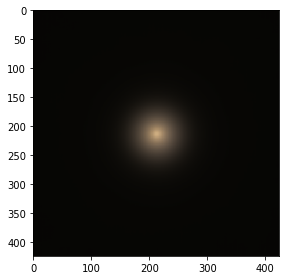

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
io.imshow(res.astype('uint8'))
plt.show()

as we can see from dataset most of the data (galaxy) is only in 1/4 of the picture. So we can crop them without any data loss.

In [4]:
a = res

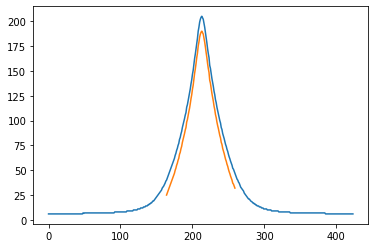

In [5]:
import matplotlib.pyplot as plt
plt.plot((a[212,:,0] + a[211,:,0])/2)
plt.plot(list(range(164,260)), ((a[212,164:260,0] + a[211,164:260,0])/2)-15)
plt.show()


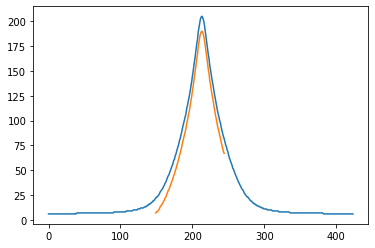

In [10]:
plt.plot((a[:,212,0] + a[:,211,0])/2)
plt.plot(list(range(149,245)), ((a[149:245,212,0] + a[149:245,211,0])/2)-15)
plt.show()